In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sum
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix ,accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df=pd.read_csv("diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
84,5,137,108,0,0,48.8,0.227,37,1
494,3,80,0,0,0,0.0,0.174,22,0
51,1,101,50,15,36,24.2,0.526,26,0
369,1,133,102,28,140,32.8,0.234,45,1
532,1,86,66,52,65,41.3,0.917,29,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

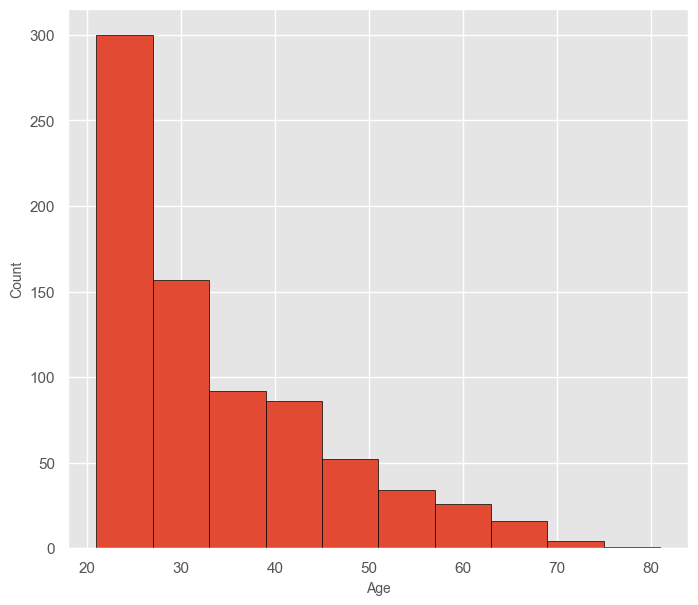

In [8]:
plt.figure(figsize=(8,7))
plt.xlabel('Age',fontsize=10)
plt.ylabel("Count",fontsize=10)
df['Age'].hist(edgecolor='black')

In [9]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


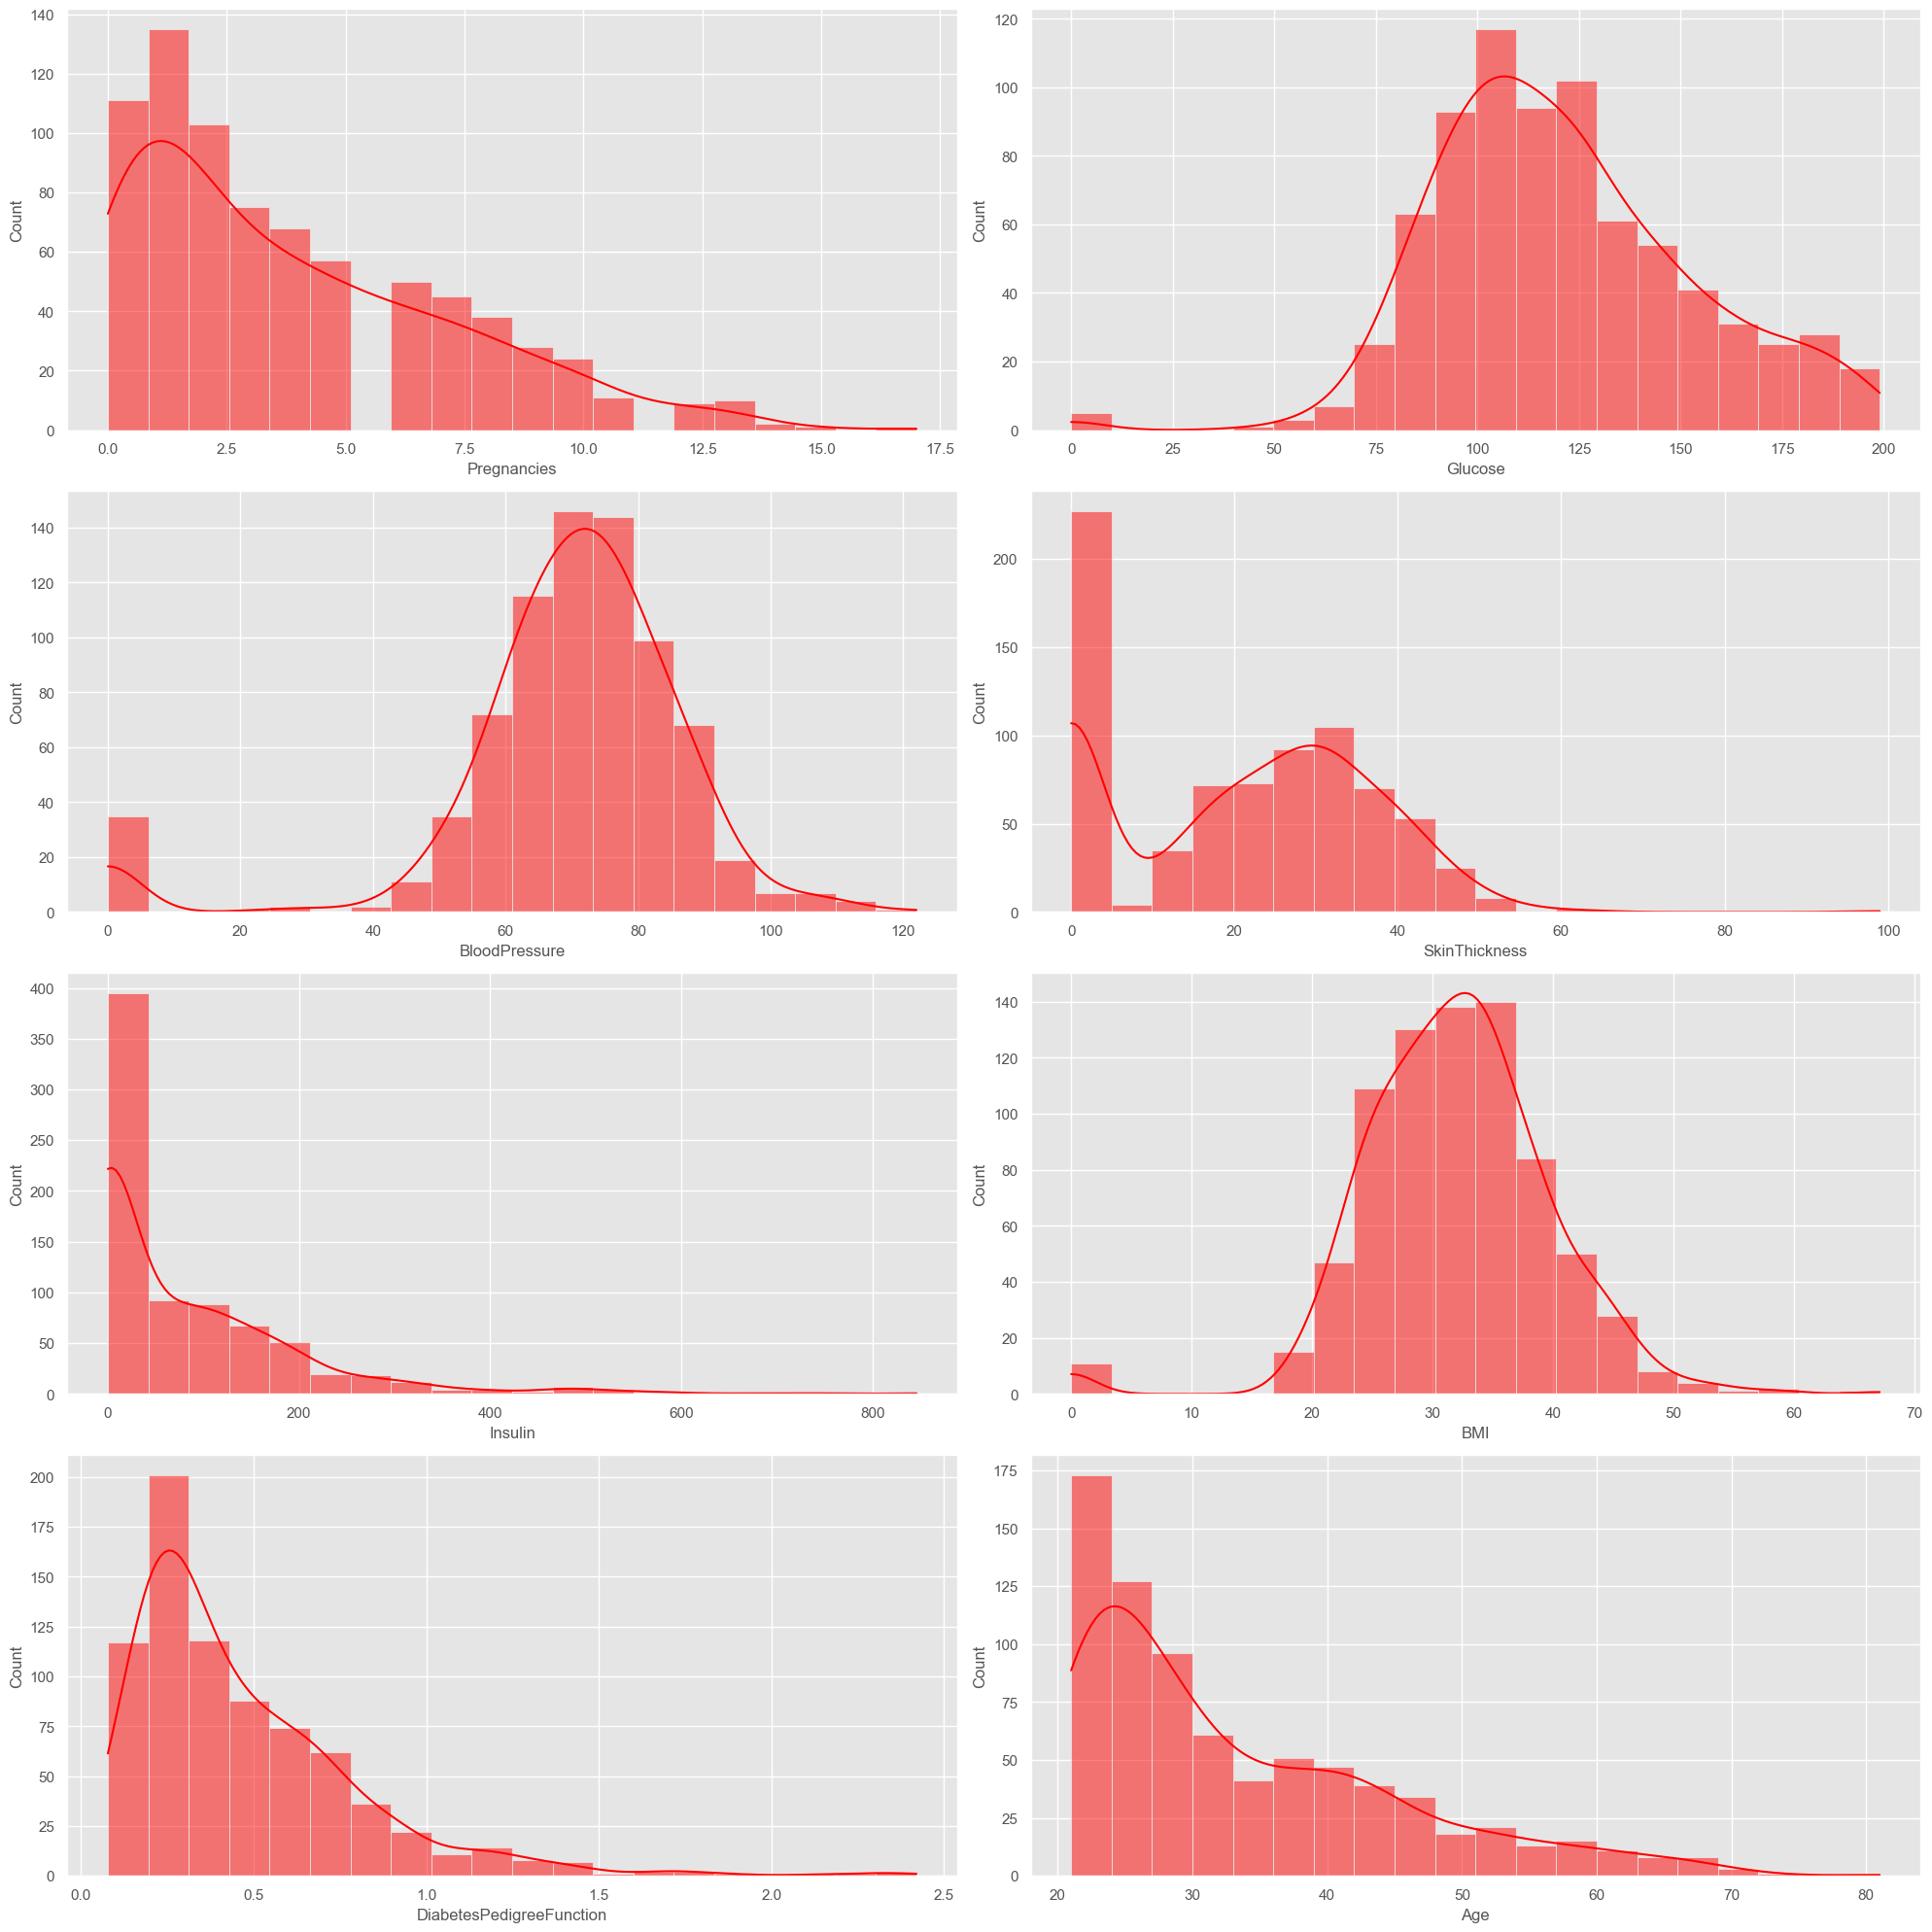

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 2, figsize=(20, 20))

sns.histplot(df.Pregnancies, bins=20, ax=ax[0,0], color='red', kde=True)
sns.histplot(df.Glucose, bins=20, ax=ax[0,1], color='red', kde=True)
sns.histplot(df.BloodPressure, bins=20, ax=ax[1,0], color='red', kde=True)
sns.histplot(df.SkinThickness, bins=20, ax=ax[1,1], color='red', kde=True)
sns.histplot(df.Insulin, bins=20, ax=ax[2,0], color='red', kde=True)
sns.histplot(df.BMI, bins=20, ax=ax[2,1], color='red', kde=True)
sns.histplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color='red', kde=True)
sns.histplot(df.Age, bins=20, ax=ax[3,1], color='red', kde=True)

plt.tight_layout()
plt.show()


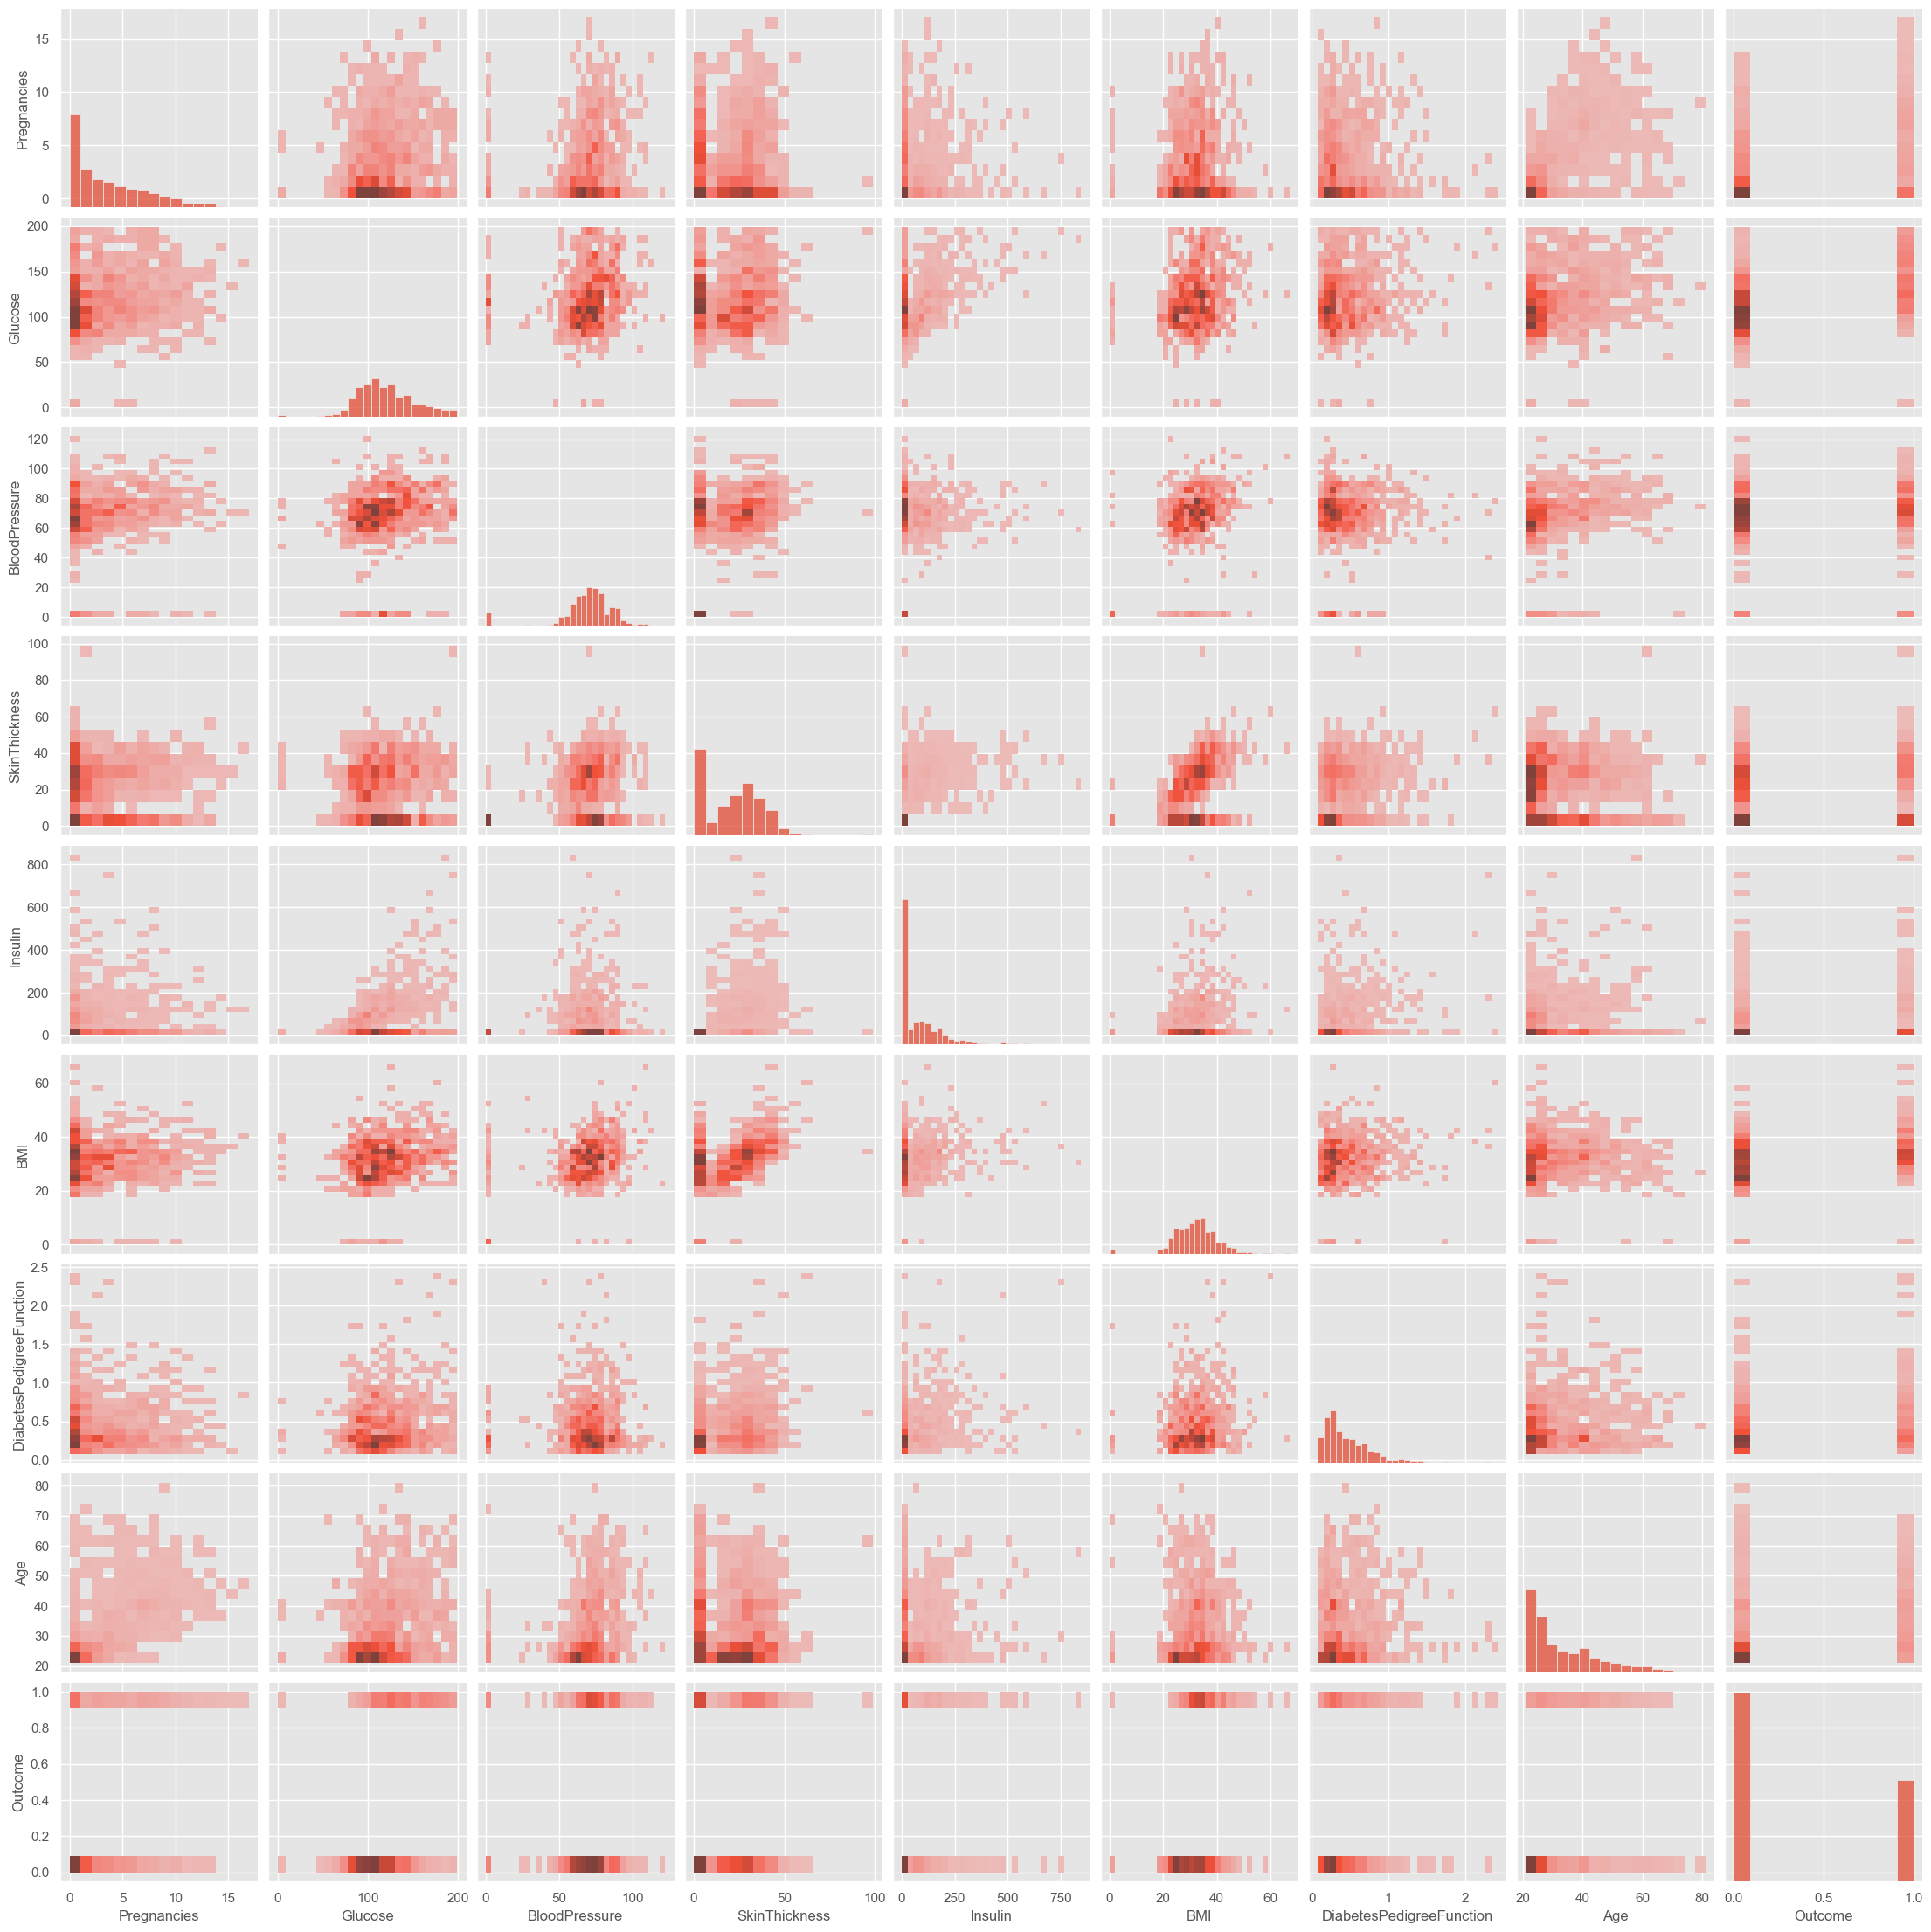

In [11]:
# fig.ax =plt.subplot(1,2, figsize=(20,20))
sns.pairplot(df,kind="hist")

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [14]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [15]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [16]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [17]:
# 0--> Healthy
# 1--> diabetes

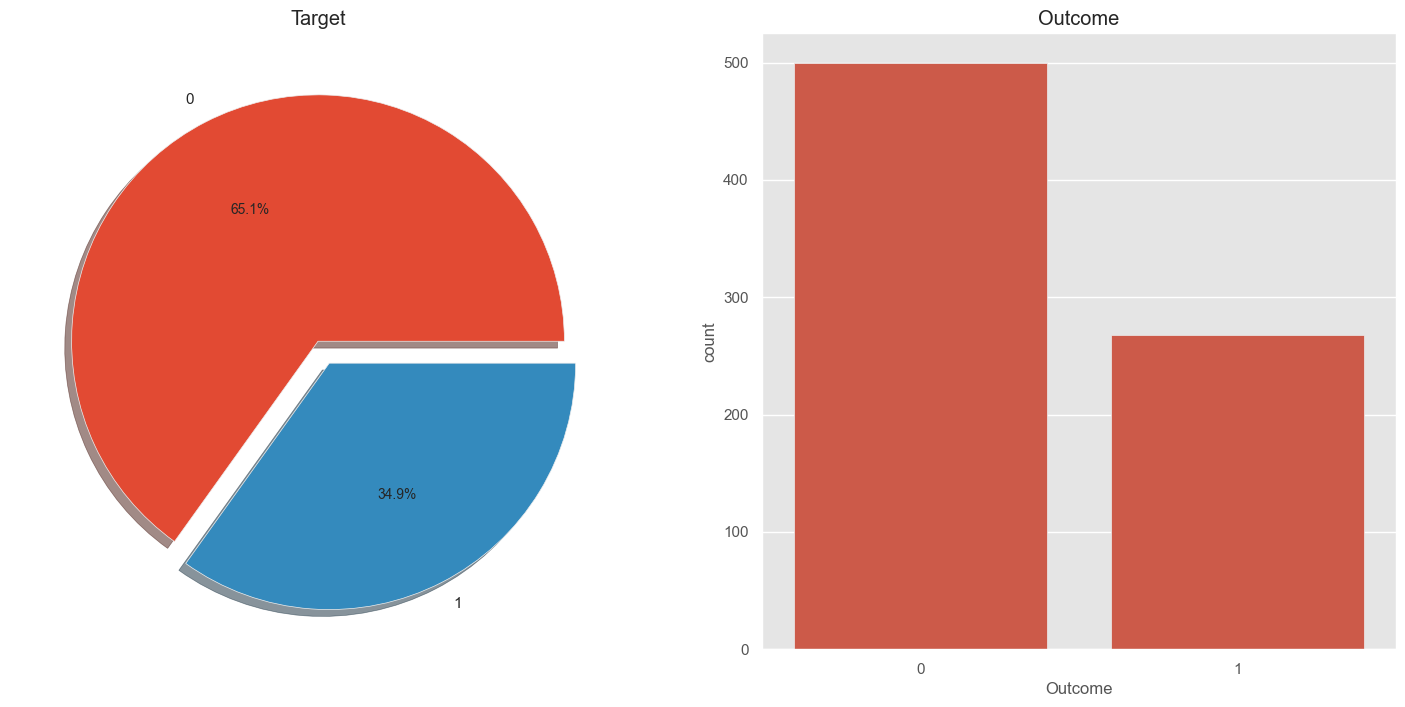

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')  # Remove y-axis label

# Count plot
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title("Outcome")

# Show plot
plt.show()


In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


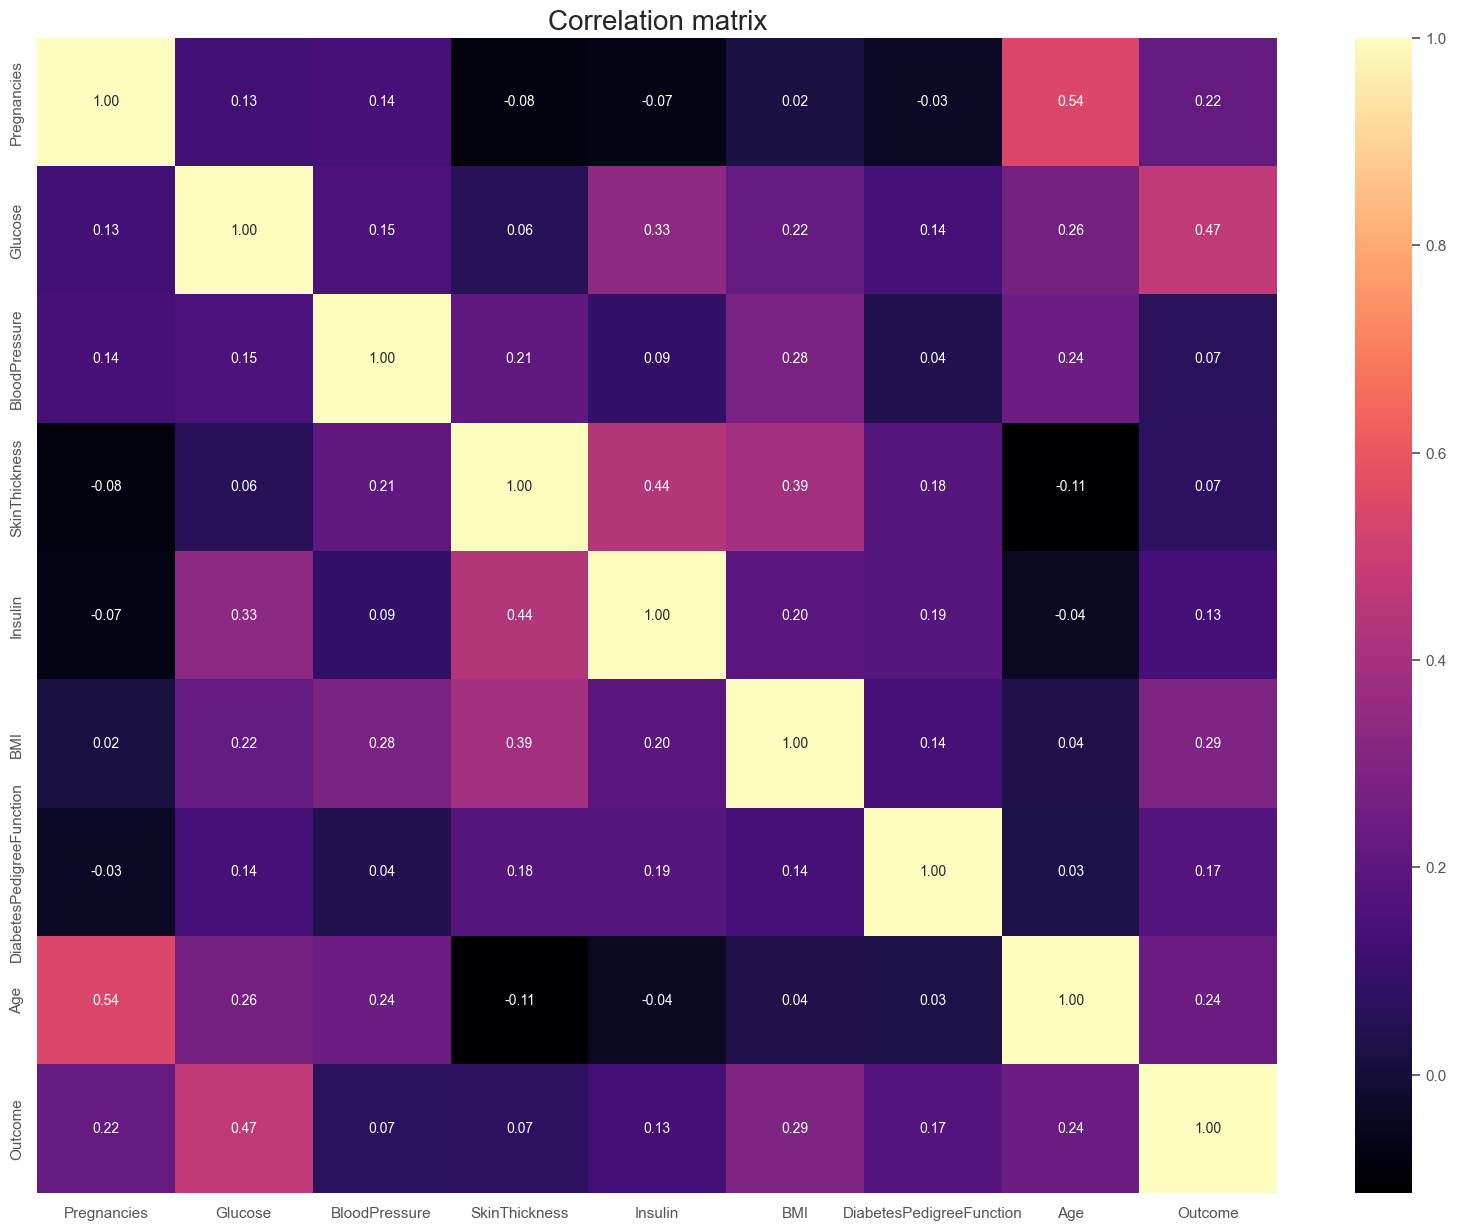

In [20]:
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f',ax=ax,cmap='magma')
ax.set_title("Correlation matrix",fontsize=20)
plt.show()

In [21]:
# the dataset having NAN value so , i need to replace it with 0
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [23]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

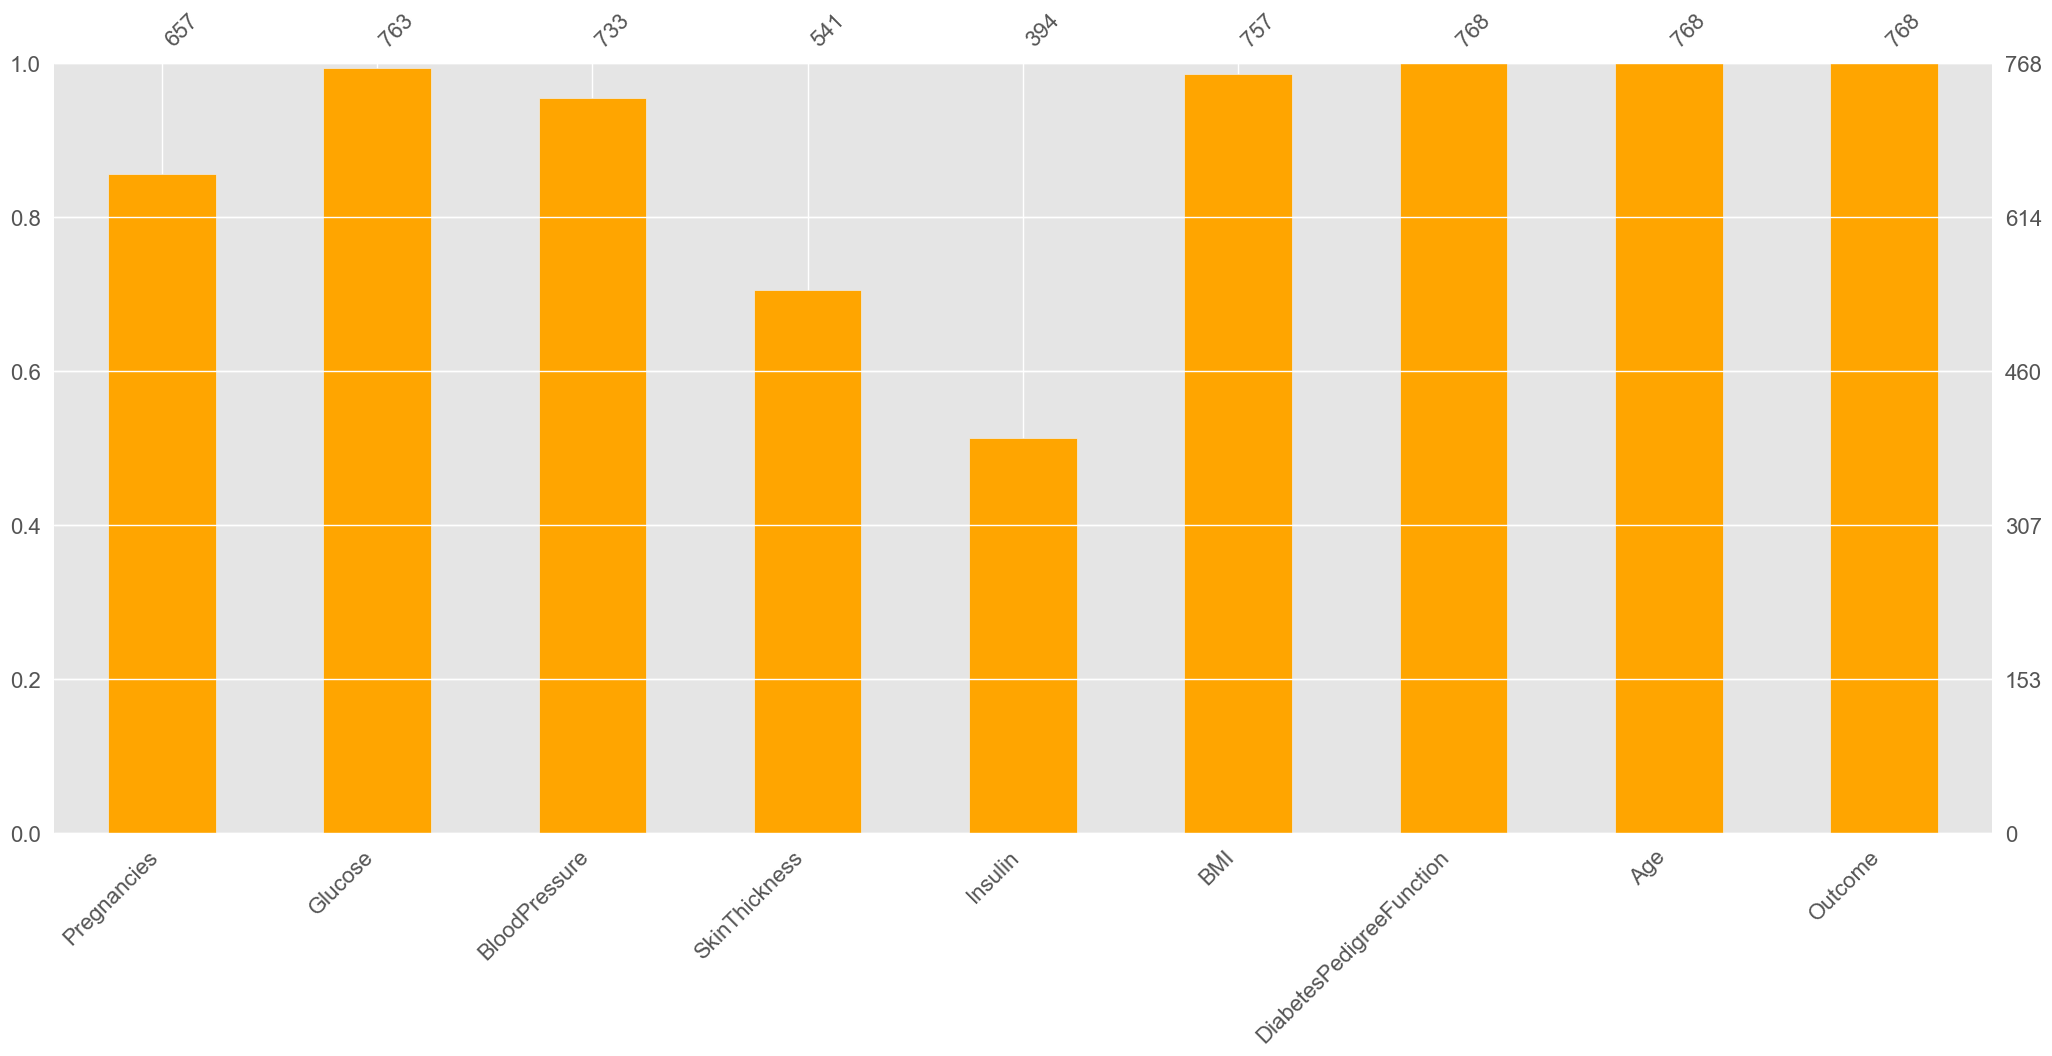

In [24]:
import missingno as msno
msno.bar(df,color='Orange')

In [25]:
def median_target(var):
    temp=df[df[var].notnull()]
    temp=temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [26]:
columns= df.columns
columns=columns.drop('Outcome')
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome']==1) & (df[i].isnull()),i]=median_target(i)[i][1]

In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

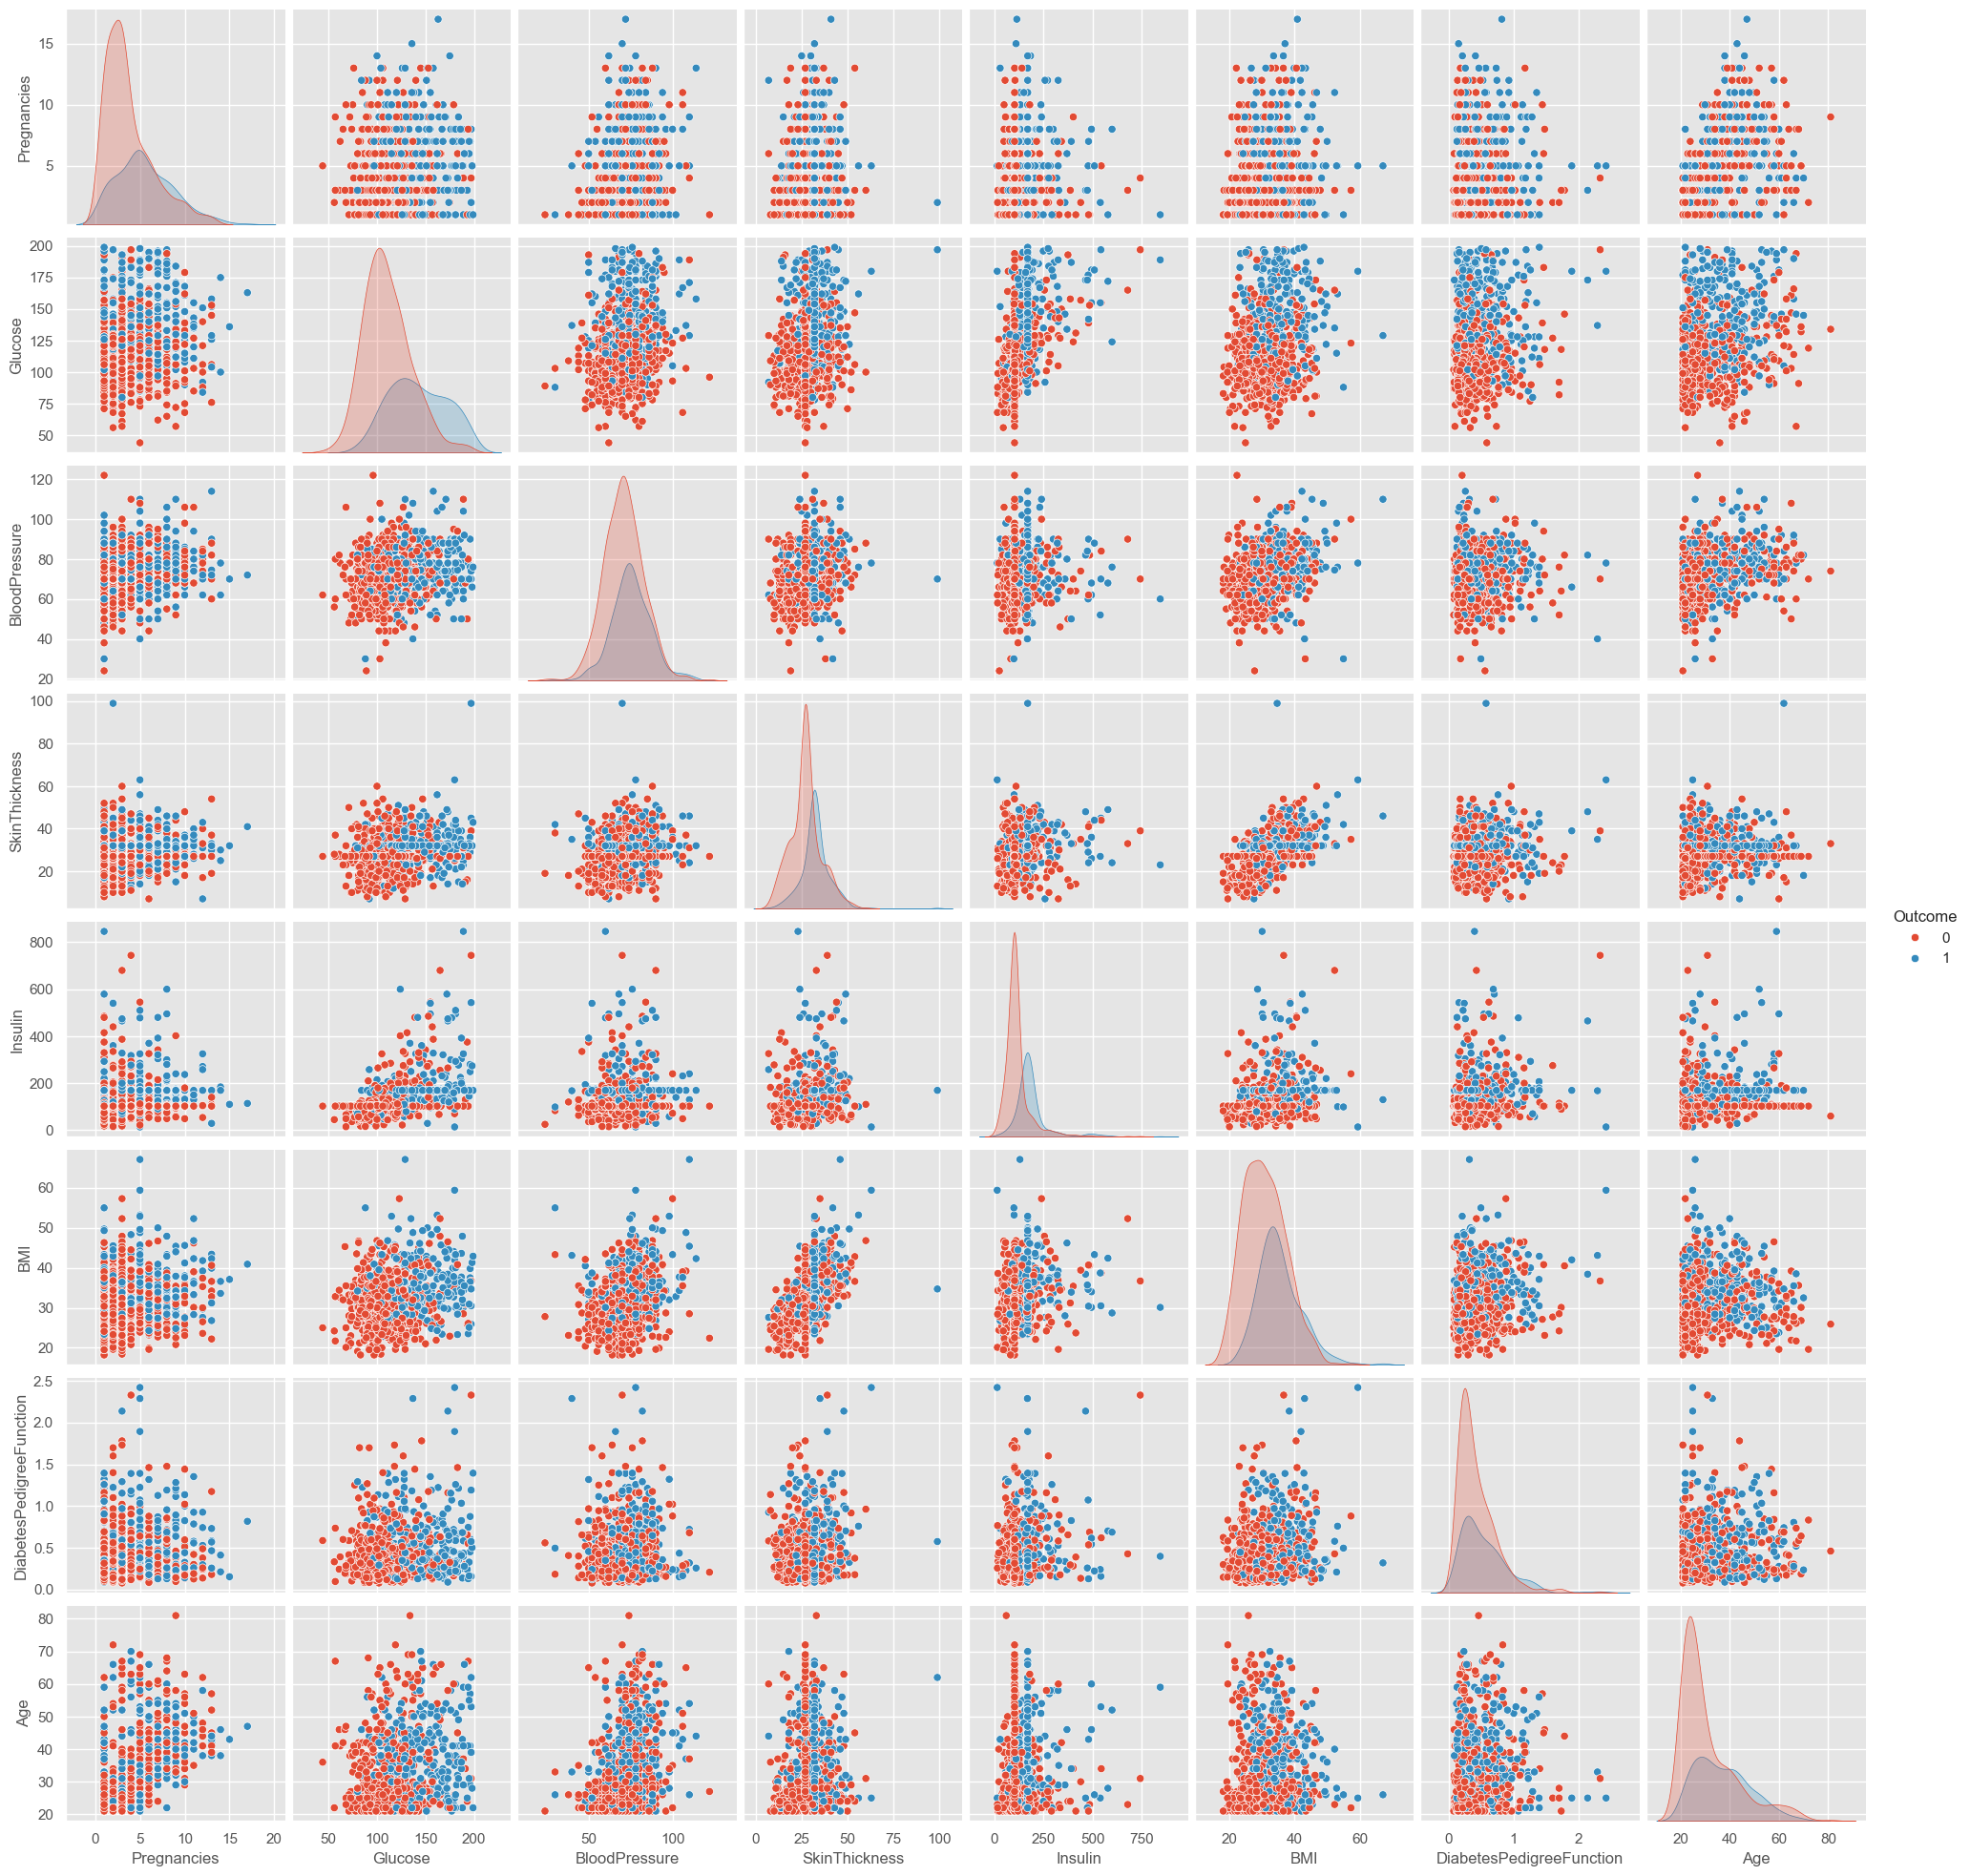

In [28]:
p=sns.pairplot(df,hue='Outcome')

In [29]:
# IQR
for feature in df:
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR= Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature,"Yes")
    else:
        print(feature,"no")

Pregnancies Yes
Glucose no
BloodPressure Yes
SkinThickness Yes
Insulin Yes
BMI Yes
DiabetesPedigreeFunction Yes
Age Yes
Outcome no


<Axes: xlabel='Insulin'>

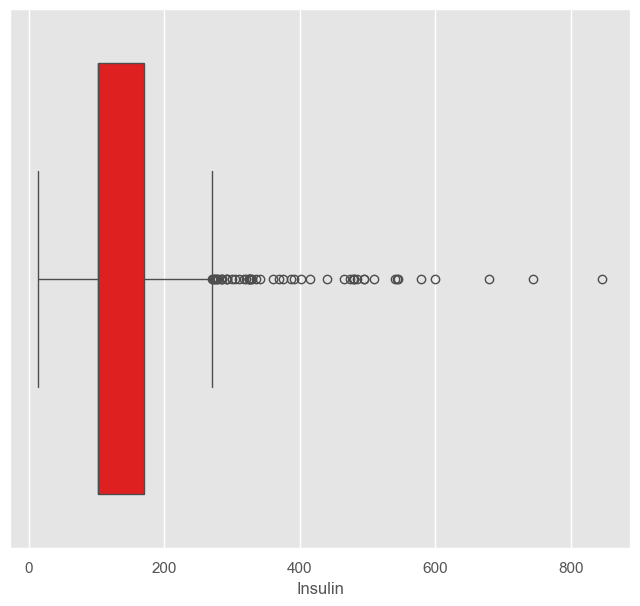

In [30]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df['Insulin'],color="red")

In [31]:
Q1=df.Insulin.quantile(0.25)
Q3=df.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df.loc[df['Insulin']>upper,"Insulin"]=upper

<Axes: xlabel='Insulin'>

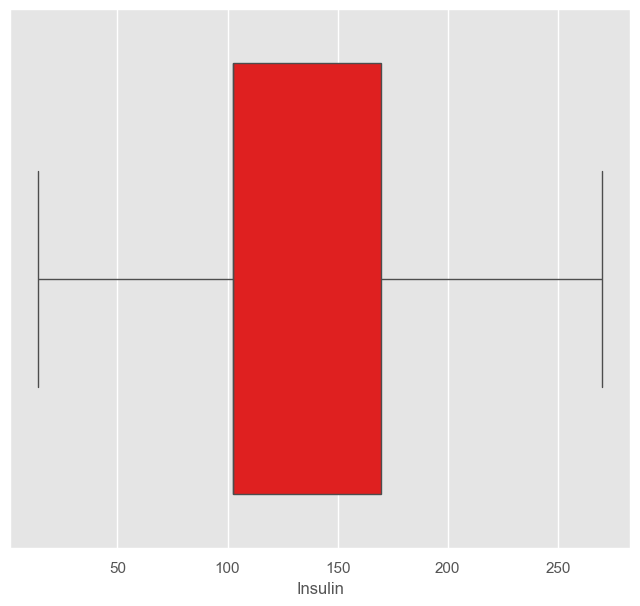

In [32]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df['Insulin'],color="red")

In [33]:
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

<Axes: xlabel='Pregnancies'>

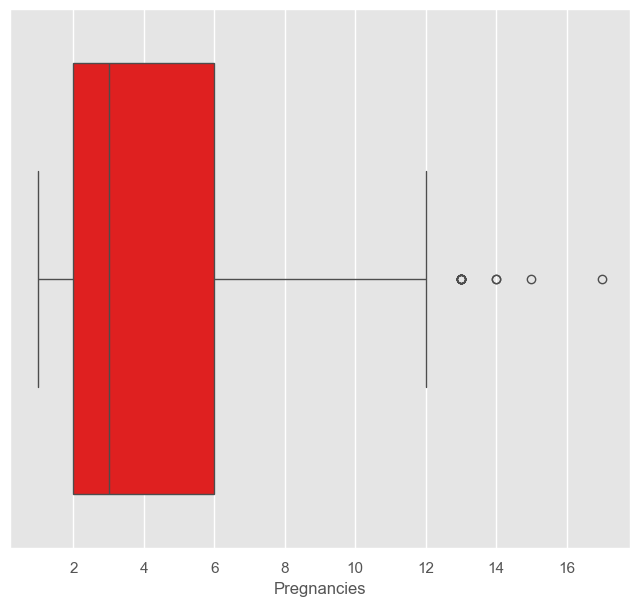

In [34]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df['Pregnancies'],color="red")

In [35]:
df_scores=lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [36]:
threshold=np.sort(df_scores)[7]

In [37]:
threshold

-1.7497423670960557

In [38]:
outlier=df_scores>threshold

In [39]:
df=df[outlier]

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [41]:
df.shape

(760, 9)

<Axes: xlabel='BMI'>

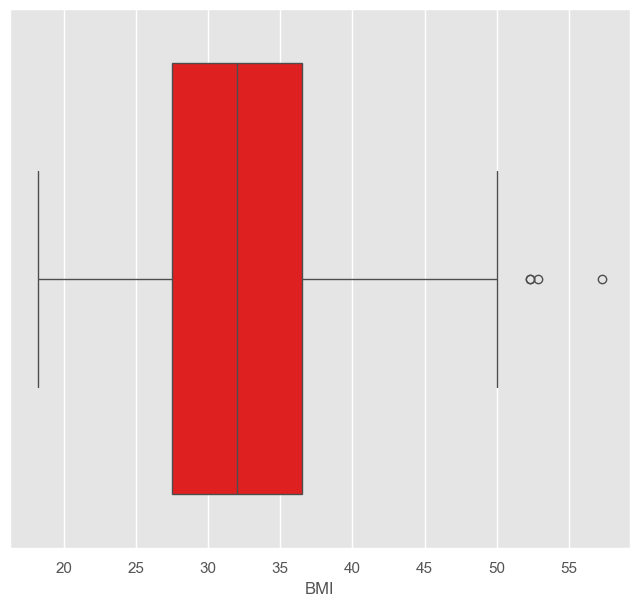

In [42]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df['BMI'],color="red")

In [43]:
# feature Engineering
NewBMI=pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"],dtype ="category")

In [44]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [45]:
df['NewBMI']=NewBMI
df.loc[df['BMI']<18.5,"NewBMI"]=NewBMI[0]
df.loc[(df['BMI']>18.5) & df["BMI"]<=24.9 ,"NewBMI"]=NewBMI[1]
df.loc[(df['BMI']>24.9) & df["BMI"]<=29.9 ,"NewBMI"]=NewBMI[2]
df.loc[(df['BMI']>29.9) & df["BMI"]<=34.9 ,"NewBMI"]=NewBMI[3]
df.loc[(df['BMI']>34.9) & df["BMI"]<=39.9 ,"NewBMI"]=NewBMI[4]
df.loc[df['BMI']>39.9,"NewBMI"]=NewBMI[5]

C:\Users\Soumaya\AppData\Local\Temp\ipykernel_7476\4229290911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewBMI']=NewBMI


In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [47]:
# if insulin>=16 & insulin<=166-> Normal
def set_insulin(row):
    if row['Insulin']>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [48]:
df=df.assign(NewInsulinScore=df.apply(set_insulin,axis=1))

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [50]:
# feature Engineering
NewGlucose=pd.Series(["Low","Normal","Overweight","Secret","High"],dtype ="category")
df['NewGlucose']=NewGlucose
df.loc[df['Glucose']<=70,"NewGlucose"]=NewGlucose[0]
df.loc[(df['Glucose']>70) & (df["Glucose"]<=99) ,"NewGlucose"]=NewGlucose[1]
df.loc[(df['Glucose']>99) & (df["Glucose"]<=126) ,"NewGlucose"]=NewGlucose[2]
df.loc[df['Glucose']>126,"NewGlucose"]=NewGlucose[3]

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [52]:
# One-hot encoding
df=pd.get_dummies(df,columns=["NewBMI","NewInsulinScore","NewGlucose"],drop_first=True).astype(int)

In [53]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,169,33,0,50,1,0,1,0,0,0,0,0,0,0,1
1,1,85,66,29,102,26,0,31,0,0,1,0,0,0,1,0,1,0,0
2,8,183,64,32,169,23,0,32,1,0,1,0,0,0,0,0,0,0,1
3,1,89,66,23,94,28,0,21,0,0,1,0,0,0,1,0,1,0,0
4,5,137,40,35,168,43,2,33,1,0,0,1,0,0,0,0,0,0,1


In [54]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [55]:
categorical_df=df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [56]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [57]:
y=df['Outcome']
x=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],axis=1)

In [58]:
cols=x.columns
index=x.index

In [59]:
from sklearn.preprocessing import RobustScaler
transformer=RobustScaler().fit(x)
x=transformer.transform(x)
x=pd.DataFrame(x,columns=cols,index=index)

In [60]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.111111,0.0,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588
4,0.50,0.500,-2.000,1.000000,0.985075,1.222222,2.0,0.235294


In [61]:
x=pd.concat([x,categorical_df],axis=1)

In [62]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.775,0.000,1.000000,1.000000,0.111111,0.0,1.235294,0,1,0,0,0,0,0,0,0,1
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647,0,1,0,0,0,1,0,1,0,0
2,1.25,1.650,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471,0,1,0,0,0,0,0,0,0,1
3,-0.50,-0.700,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588,0,1,0,0,0,1,0,1,0,0
4,0.50,0.500,-2.000,1.000000,0.985075,1.222222,2.0,0.235294,0,0,1,0,0,0,0,0,0,1


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [65]:
# Machine Learning Algorithm
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred=log.predict(x_test)

In [67]:
print("Training Accuracy",accuracy_score(y_train,log.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,log.predict(x_test)))
print(50*"*")
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

Training Accuracy 0.8453947368421053
testing Accuracy  0.8881578947368421
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        98
           1       0.82      0.87      0.85        54

    accuracy                           0.89       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152



In [68]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [69]:
print("Training Accuracy",accuracy_score(y_train,knn.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,knn.predict(x_test)))
print(50*"*")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy 0.868421052631579
testing Accuracy  0.881578947368421
**************************************************
[[88 10]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        98
           1       0.82      0.85      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [70]:
svc=SVC(probability=True)
parameter={
    "gamma":[0.0001,0.001,0.01,0.1],
    "C":[0.01,0.05,0.1,1,10,15,20]
}
grid_search=GridSearchCV(svc,parameter)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [71]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [72]:
grid_search.best_score_

0.8601950955155129

In [73]:
svm=SVC(C= 10,gamma= 0.01)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,svc.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,svc.predict(x_test)))
print(50*"*")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy 0.8930921052631579
testing Accuracy  0.881578947368421
**************************************************
[[89  9]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        98
           1       0.83      0.83      0.83        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [74]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,dt.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,dt.predict(x_test)))
print(50*"*")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy 1.0
testing Accuracy  0.8618421052631579
**************************************************
[[87 11]
 [10 44]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        98
           1       0.80      0.81      0.81        54

    accuracy                           0.86       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



In [75]:
parameter={
    'criterion':['gini','entropy'],
    "max_depth":[3,5,7,10],
    "splitter":['best','random'],
    "min_samples_leaf":[1,2,3,5,7],
    "min_samples_split":[1,2,3,5,7],
    'max_features':["auto","sqrt",'log2']    
}
grid_search_dt=GridSearchCV(dt,parameter,cv=50,n_jobs=-1,verbose=1)
grid_search_dt.fit(x_train,y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


c:\Users\Soumaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
28000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9983 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Soumaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Soumaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Soumaya\AppData\Local\Programs\Python\Python311\Lib\site-packages

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [76]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [77]:
grid_search_dt.best_score_

0.8744871794871796

In [78]:
dt=grid_search_dt.best_estimator_
y_pred=dt.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,dt.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,dt.predict(x_test)))
print(50*"*")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy 0.9325657894736842
testing Accuracy  0.875
**************************************************
[[87 11]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        98
           1       0.81      0.85      0.83        54

    accuracy                           0.88       152
   macro avg       0.86      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [79]:
rf=RandomForestClassifier(criterion='entropy',max_depth=15,max_features=0.75,min_samples_leaf=2,min_samples_split=3,n_estimators=130)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,rf.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,rf.predict(x_test)))
print(50*"*")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Training Accuracy 0.9884868421052632
testing Accuracy  0.9144736842105263
**************************************************
[[90  8]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        98
           1       0.86      0.91      0.88        54

    accuracy                           0.91       152
   macro avg       0.90      0.91      0.91       152
weighted avg       0.92      0.91      0.91       152



In [80]:
gbc=GradientBoostingClassifier(loss='exponential',n_estimators=150)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,gbc.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,gbc.predict(x_test)))
print(50*"*")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy 0.9950657894736842
testing Accuracy  0.9013157894736842
**************************************************
[[90  8]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        98
           1       0.85      0.87      0.86        54

    accuracy                           0.90       152
   macro avg       0.89      0.89      0.89       152
weighted avg       0.90      0.90      0.90       152



In [81]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.01,max_depth=10,n_estimator=180)
xgb.fit(x_train,y_train)

c:\Users\Soumaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:49:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=180, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [82]:
y_pred=xgb.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,xgb.predict(x_train)))
print("testing Accuracy ",accuracy_score(y_test,xgb.predict(x_test)))
print(50*"*")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy 0.9473684210526315
testing Accuracy  0.868421052631579
**************************************************
[[89  9]
 [11 43]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.83      0.80      0.81        54

    accuracy                           0.87       152
   macro avg       0.86      0.85      0.86       152
weighted avg       0.87      0.87      0.87       152



In [83]:
import pickle
pickle.dump(svm,open('Diabetes.pkl','wb'))